___

# <center>COMMON CLASSIFICATION EVALUATION METRICS</center>
___

How accurate is a clasification model?Is the model reliable?

These two questions are easily  answered by evaluating how well a model performs when subjected to unseen observations.This post ilustrates some of the best the ways models models can be evaluated.

What you will learn from this post:

1. Jaccard index.
1. Confussion Matrix
1. F-1 Score
1. Log loss



First I will fit a simple model and use it to illustrate these methods are applied in model performance evaluation.

In [1]:
# quick model fit
import numpy as np
import warnings
import pandas
warnings.filterwarnings("ignore")#not recomended but i have included this for my own convenience.
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pandas.DataFrame(data = data.data,columns=data.feature_names)
y = data.target
#train test split
from sklearn import model_selection
np.random.seed(2) #to enable you replicate the same thing i am doing here.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.30)
# I will use logistic reg
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)
preds = reg.predict(X_test)
predsprob = reg.predict_proba(X_test)

## Jaccard Index.

Given predicted values as $\hat y$ and actual values as $y$,the jaccard index can be defied as :

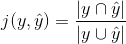

$$= \frac{|y\cap \hat y|}{|y|+|\hat y|-|y\cap \hat y|}$$

so lets say you have the folowing set of predicted and actual values.

$$predicted:[0,0,0,0,0,1,1,1,1,1]$$
$$actual: [1,1,0,0,0,1,1,1,1,1]$$
the jaccard index will be :
$$j(y,\hat y) = \frac{8}{10+10-8}=0.66$$

The idea behind this index is that higher the similarity of these two groups the higher the index.

### Applying this to the model above.

In [117]:
from sklearn.metrics import jaccard_similarity_score
j_index = jaccard_similarity_score(y_true=y_test,y_pred=preds)
round(j_index,2)

0.94

## Confussion matrix
Confusion matrix is used to describe the performance of a classification model on a set of test data for which true values are known.
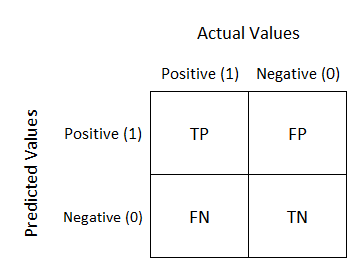

From the confusion matrix the following information can be extracted :

1. **True positive(TP).**: This shows that a model **correctly**predicted **Positive** cases as **Positive**.
eg an illness is diagnosed as present and truly is present.

1. **False positive(FP):** This shows that a model **incorrectly**predicted **Negative** cases as **Positive**.eg an illness is diagnosed as present and but is absent.(Type I error)

1. **False Negative:(FN)** This shows that a **incorrectly** model predicted **Positive** cases as **Negative**.eg an illness is diagnosed as absent and but is present.(Type II error)

1. **True Negative(TN)**This shows that a model **correctly**predicted **Negative** cases as **Positive**.
eg an illness is diagnosed as absent and truly is absent.

### Applying this to the model above

In [118]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,preds,labels=[1,0]))

[[98  6]
 [ 5 62]]


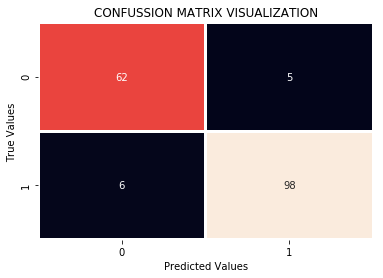

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,preds),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In this case for the breast cancer data,the model corectly predicts 61 cases as benign and 100 cases as maligant.
In contrast it mispredicts a total of 9 cases.

## F1-Score.

This comes from the cinfusion matrix.Based on the above confussion matrix above,we can calculate the **precision** and the **recal socres.**

**Precision score:** this is the measure of the accuracy ,provided that a class label has been predicted.Simply put,it answers the following question,**of all the classes ,how many were correctly predicted?** The answer to this question should be as high as posible.

It can be calculated as follows:
$$Precision = \frac{TP}{TP+FP}$$

**Recal score(Sensitivity)**:
This is the true positive rate that is if it predicts positive then how often does this take place?

$$TP=\frac{TP}{TP+FN}$$

The F1 score is calculated based on the precision and recal of each class.
It is the weighted average of the Precision and the recal scores.The F1 score reaches its perfect value at one and worst at 0.It is avery good way to show that a classifies has a good recal and precision values.

We can calculate it using this formula:

$$F1Score = 2(\frac{Precision\times Recal}{Precision +  Recal})$$

### Applying to the model above.

In [120]:
from sklearn.metrics import f1_score
f1_score(y_test,preds)

0.9468599033816425

F1 score can be calculated for all classes so that an average of the realized scores can be used as shown in the classification report bellow.

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.95      0.94      0.95       104

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## Log loss.
We can use the log loss in cases where the outcome of the classifier is a class probability and not a class label like in cases of logistic regression models.

Log loss measures the performance of a model where the predicted outcome is a probability value between 0 and 1.

In real life when predicting a probability of 0.101 when the true label should be 1 would result in a high log loss.
Log loss can be calculated for each row in the data set using the **Log loss equation**. 

$$L= (y\times \log(\hat y)+(1-y)+\log(1-\hat y))$$

The equation simply measures how far each predicted probability is from the actual label.An average of the log loss from all the rows gives the ideal value for the log loss.

$$Lloss= -\frac{1}{n}\sum(y\times \log(\hat y)+(1-y)+\log(1-\hat y))$$

A good and model should have a smaller log loss value.

### Applying in the above model.

In [122]:
from sklearn.metrics import log_loss
log_loss(y_test,predsprob)

0.13710589473837184

And there we have a 0.18 log loss!